In [1]:
import pandas as pd
import numpy as np
import pdb, argparse
import os, pdb, math, itertools
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from kdutils.macro2 import *

In [23]:
method = 'cicso0'
instruments = 'ims'
period = 5
name = 'linear'
task_id = str(INDEX_MAPPING[INSTRUMENTS_CODES[instruments]])

In [24]:
dirs = os.path.join(base_path, method, instruments, 'temp', "model", task_id,
                    str(period))

In [25]:
filename = os.path.join(dirs, "{0}_predict_data.feather".format(name))
filename

'./records/cicso0/ims/temp/model/200037/5/linear_predict_data.feather'

In [26]:
predict_data = pd.read_feather(filename)
predict_data.head()

,trade_time,code,predict,nxt1_ret_5h
0,2024-12-05 10:20:00,IM,-5.284011,-0.001860
1,2024-12-05 10:21:00,IM,-6.157190,-0.000716
2,2024-12-05 10:22:00,IM,-2.766501,-0.001164
3,2024-12-05 10:23:00,IM,0.370487,-0.000192
4,2024-12-05 10:24:00,IM,0.937852,-0.000006


In [27]:
is_on_mark = predict_data['trade_time'].dt.minute % int(period) == 0
predict_data = predict_data[is_on_mark]
predict_data.replace([np.inf, -np.inf], np.nan, inplace=True)
predict_data.dropna(inplace=True)
predict_data.head()

,trade_time,code,predict,nxt1_ret_5h
0,2024-12-05 10:20:00,IM,-5.284011,-0.001860
5,2024-12-05 10:25:00,IM,-0.186690,-0.000206
10,2024-12-05 10:30:00,IM,-1.949980,0.003050
15,2024-12-05 10:35:00,IM,-0.980163,0.004669
20,2024-12-05 10:40:00,IM,-5.241567,0.000327


In [28]:
from lib.cux001 import FactorEvaluate1

In [29]:
evaluate1 = FactorEvaluate1(factor_data=predict_data,
                                factor_name='predict',
                                ret_name='nxt1_ret_{0}h'.format(period),
                                roll_win=240,
                                fee=0.000,
                                scale_method='roll_zscore',
                                expression=name)

In [30]:
stats_dt = evaluate1.run()

In [31]:
stats_dt

{'total_ret': 0.06924036539165801,
 'avg_ret': 2.437217501994363e-05,
 'max_dd': -0.016258677917504794,
 'calmar': 4.258671322660919,
 'sharpe1': 0.03470635030974599,
 'sharpe2': 3.453522040710745,
 'turnover': 0.40388720824865365,
 'win_rate': 0.46368159203980097,
 'profit_ratio': 1.128302547036211,
 'ic_mean': 0.03687034470406985,
 'ic_std': 0.06810940907546915,
 'ic_ir': 0.5413399588185441,
 'factor_autocorr': -0.13872630590550042,
 'ret_autocorr': -0.037199780961824996}

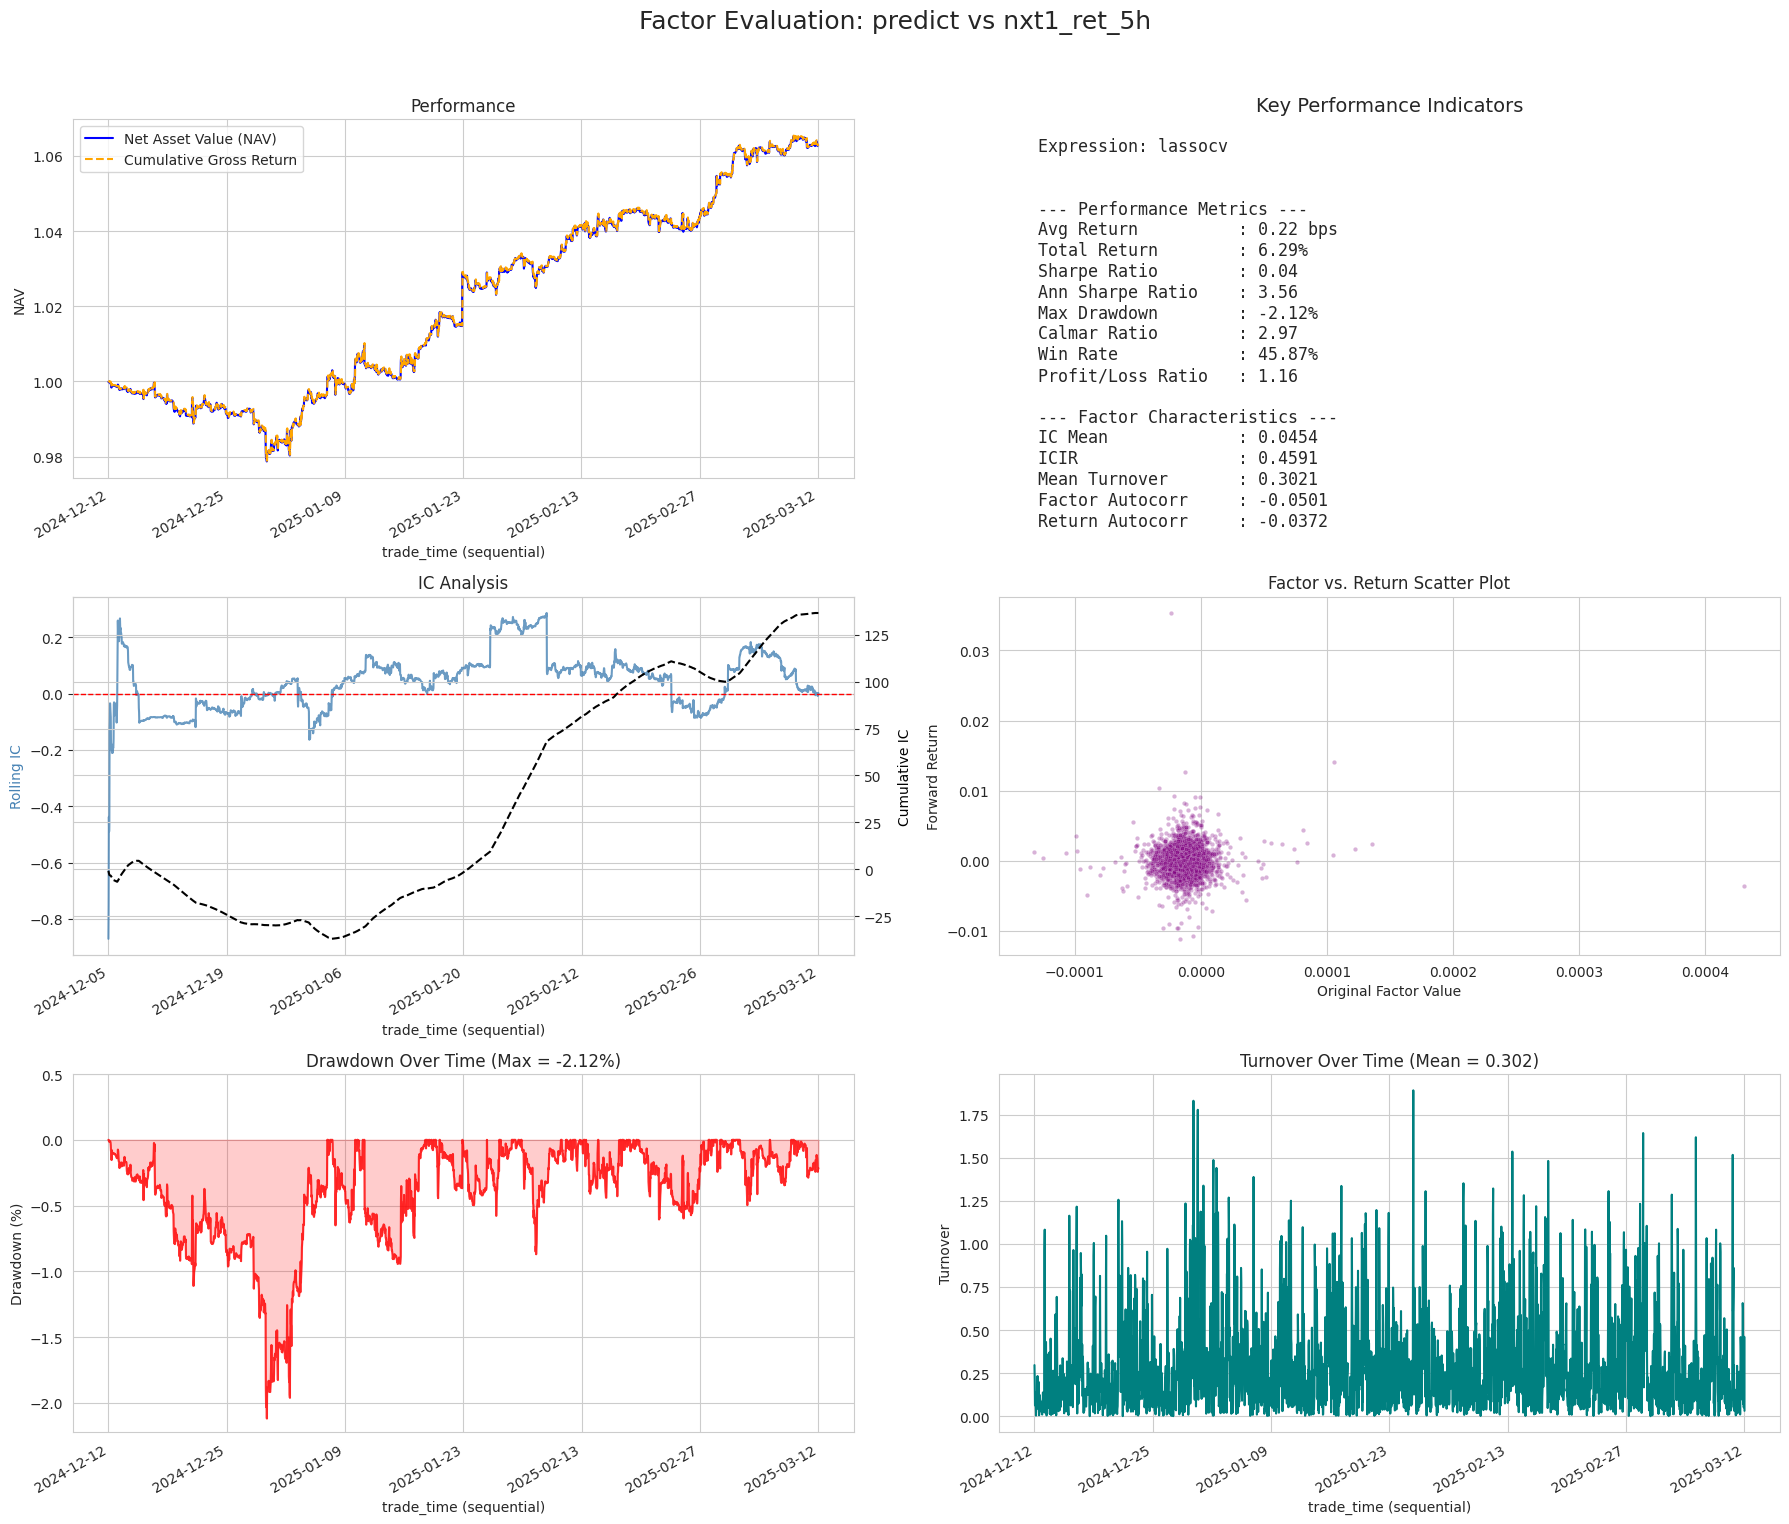

In [22]:
evaluate1.plot_results()